In [203]:
import pandas as pd
import numpy as np
import requests

# Leer los datos y normalizar el JSON
df = pd.read_json('https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json?raw=true')
datos_cli = pd.json_normalize(df['customer'])

# Añadir la columna de churn
datos_cli['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).fillna(-1)

# Definir la variable churn_col
churn_col = 'Churn'

# Análisis de Evasión de Clientes (Churn) en TelecomX

## Objetivo del Análisis
Este notebook presenta un análisis exhaustivo de la evasión de clientes (churn) en TelecomX. El objetivo principal es identificar los factores que influyen en la decisión de los clientes de abandonar los servicios, permitiendo desarrollar estrategias efectivas de retención.

## Estructura del Análisis
1. **Preparación de Datos**
   - Carga y limpieza de datos
   - Tratamiento de valores ausentes y outliers
   - Transformaciones y codificación de variables

2. **Análisis Exploratorio**
   - Distribución de variables
   - Análisis de la variable objetivo (churn)
   - Relaciones entre variables

3. **Modelado Predictivo**
   - Preparación para modelado
   - Entrenamiento de modelos
   - Evaluación de resultados

4. **Conclusiones y Recomendaciones**
   - Insights principales
   - Estrategias propuestas
   - Próximos pasos

In [204]:
# Filtrar registros con valores indefinidos de churn (-1)
print('Shape antes de filtrar valores indefinidos:', datos_cli.shape)
datos_cli = datos_cli[datos_cli['Churn'] != -1]
print('Shape después de filtrar valores indefinidos:', datos_cli.shape)

# Verificar los valores únicos en la columna Churn
print('\nValores únicos en la columna Churn:')
print(datos_cli['Churn'].value_counts())

Shape antes de filtrar valores indefinidos: (7267, 6)
Shape después de filtrar valores indefinidos: (7043, 6)

Valores únicos en la columna Churn:
Churn
0.0    5174
1.0    1869
Name: count, dtype: int64


In [205]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [206]:
df.to_json('TelecomX_Data.json', orient='records', lines=True)

In [207]:
datos_cli = pd.json_normalize(df['customer'])
datos_cli

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [208]:
# Diagnóstico: mostrar todas las columnas y primeras filas para identificar la columna objetivo
print('Columnas disponibles:')
print(datos_cli.columns.tolist())
print('\nPrimeras filas:')
display(datos_cli.head(10))

Columnas disponibles:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure']

Primeras filas:


,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
5,Female,0,No,Yes,9
6,Female,1,Yes,No,71
7,Male,0,Yes,No,63
8,Female,1,No,No,7
9,Female,0,Yes,Yes,65


In [209]:
# Mostrar todas las columnas y primeras filas para identificar la columna de churn
print('Columnas disponibles:')
print(datos_cli.columns.tolist())
print('\nPrimeras filas:')
display(datos_cli.head(10))

Columnas disponibles:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure']

Primeras filas:


,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
5,Female,0,No,Yes,9
6,Female,1,Yes,No,71
7,Male,0,Yes,No,63
8,Female,1,No,No,7
9,Female,0,Yes,Yes,65


## Exploración de columnas y tipos de datos
A continuación se muestran las columnas del dataset y sus tipos de datos. También se consulta el diccionario de variables para comprender el significado de cada una y se identifican las columnas más relevantes para el análisis de evasión.

In [210]:
# Mostrar las columnas y los tipos de datos del DataFrame de clientes
print('Columnas:', datos_cli.columns.tolist())
print('\nTipos de datos:')
print(datos_cli.dtypes)

Columnas: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure']

Tipos de datos:
gender           object
SeniorCitizen     int64
Partner          object
Dependents       object
tenure            int64
dtype: object


In [211]:
# Mostrar las primeras filas para explorar visualmente los datos
datos_cli.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


### Consulta del diccionario de variables
Para comprender mejor el significado de cada columna, es importante consultar el diccionario de variables proporcionado con el dataset o en la documentación del reto.

### Verificación de problemas en los datos
En este paso se revisan valores ausentes, duplicados, errores de formato e inconsistencias en las categorías para asegurar la calidad de los datos antes del análisis.

In [212]:
# Verificar valores ausentes y duplicados
print('Valores ausentes por columna:')
print(datos_cli.isnull().sum())

print('\nFilas duplicadas:', datos_cli.duplicated().sum())

Valores ausentes por columna:
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
tenure           0
dtype: int64

Filas duplicadas: 6376


In [213]:
# Buscar errores de formato e inconsistencias en variables categóricas
# Seleccionar columnas categóricas automáticamente
cat_cols = datos_cli.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(f'Valores únicos en {col}:', datos_cli[col].unique())

Valores únicos en gender: ['Female' 'Male']
Valores únicos en Partner: ['Yes' 'No']
Valores únicos en Dependents: ['Yes' 'No']
Valores únicos en Partner: ['Yes' 'No']
Valores únicos en Dependents: ['Yes' 'No']


In [214]:
# Si hay columnas de fecha, normalizarlas y revisar formato
fecha_cols = datos_cli.select_dtypes(include=['datetime', 'datetime64[ns]']).columns
for col in fecha_cols:
    datos_cli[col] = pd.to_datetime(datos_cli[col], errors='coerce')
    print(f'Fechas normalizadas en {col}:', datos_cli[col].dt.normalize().unique())

### Manejo de inconsistencias y limpieza de datos
En esta sección se corrigen valores ausentes, duplicados y se estandarizan las categorías y formatos para asegurar la coherencia del dataset antes del análisis.

In [215]:
# Eliminar filas duplicadas
datos_cli = datos_cli.drop_duplicates()

# Rellenar o eliminar valores nulos según el caso
# Ejemplo: rellenar nulos en columnas categóricas con 'desconocido' y en numéricas con la mediana
for col in datos_cli.columns:
    if datos_cli[col].dtype == 'object':
        datos_cli[col] = datos_cli[col].fillna('desconocido')
    else:
        datos_cli[col] = datos_cli[col].fillna(datos_cli[col].median())

# Estandarizar strings en columnas categóricas: minúsculas y sin espacios
cat_cols = datos_cli.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    datos_cli[col] = datos_cli[col].str.lower().str.strip().str.replace('á','a').str.replace('é','e').str.replace('í','i').str.replace('ó','o').str.replace('ú','u')

# Mostrar resumen de limpieza
print('Datos limpios. Filas:', len(datos_cli))

Datos limpios. Filas: 891


C:\Users\Benja\AppData\Local\Temp\ipykernel_17400\2585592534.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_cli[col] = datos_cli[col].fillna('desconocido')
C:\Users\Benja\AppData\Local\Temp\ipykernel_17400\2585592534.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_cli[col] = datos_cli[col].fillna(datos_cli[col].median())
C:\Users\Benja\AppData\Local\Temp\ipykernel_17400\2585592534.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [216]:
# Crear columna 'Cuentas_Diarias' a partir de la facturación mensual
# Suponiendo que la columna de facturación mensual se llama 'monthly_charges' (ajustar si el nombre es diferente)
if 'monthly_charges' in datos_cli.columns:
    datos_cli['Cuentas_Diarias'] = datos_cli['monthly_charges'] / 30
    print('Columna Cuentas_Diarias creada exitosamente.')
else:
    print('No se encontró la columna monthly_charges. Verifica el nombre de la columna de facturación mensual.')

# Mostrar las primeras filas para verificar
datos_cli[['monthly_charges','Cuentas_Diarias']].head() if 'Cuentas_Diarias' in datos_cli.columns else None

No se encontró la columna monthly_charges. Verifica el nombre de la columna de facturación mensual.


### Estandarización y transformación de datos (opcional)
En esta sección se transforman valores textuales a binarios y se renombran columnas para facilitar el análisis y la interpretación de los resultados.

In [217]:
# Transformar valores textuales a binarios (ejemplo: 'sí'/'no' a 1/0)
bin_map = {'sí': 1, 'si': 1, 'no': 0, 'desconocido': np.nan}
# Ajusta los nombres de las columnas según corresponda
for col in datos_cli.columns:
    if datos_cli[col].dtype == 'object' and set(datos_cli[col].unique()).intersection(bin_map.keys()):
        datos_cli[col] = datos_cli[col].map(bin_map).fillna(datos_cli[col])

# Renombrar columnas para mayor claridad (ejemplo)
datos_cli = datos_cli.rename(columns={'monthly_charges': 'Facturacion_Mensual', 'Cuentas_Diarias': 'Cuentas_Diarias'})

# Mostrar primeras filas para verificar cambios
datos_cli.head()

C:\Users\Benja\AppData\Local\Temp\ipykernel_17400\1716673586.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_cli[col] = datos_cli[col].map(bin_map).fillna(datos_cli[col])
C:\Users\Benja\AppData\Local\Temp\ipykernel_17400\1716673586.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_cli[col] = datos_cli[col].map(bin_map).fillna(datos_cli[col])


,gender,SeniorCitizen,Partner,Dependents,tenure
0,female,0,yes,yes,9
1,male,0,0.0,0.0,9
2,male,0,0.0,0.0,4
3,male,1,yes,0.0,13
4,female,1,yes,0.0,3


## Análisis Descriptivo
En esta sección se calculan métricas como media, mediana, desviación estándar y otras medidas para comprender la distribución y el comportamiento de los clientes.

In [218]:
# Estadísticas descriptivas generales
if 'churn_col' in globals() and churn_col is not None and churn_col in datos_cli.columns:
    display(datos_cli.describe(include='all').T)
    print(f'Valores únicos en la columna objetivo ({churn_col}):', datos_cli[churn_col].unique())
else:
    display(datos_cli.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,891,2,male,456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,891.0,NaN,NaN,NaN,0.384961,0.486859,0.0,0.0,0.0,1.0,1.0
Partner,891,2,yes,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,891.0,2.0,0.0,560.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,891.0,NaN,NaN,NaN,36.076319,21.018152,0.0,18.0,36.0,54.0,72.0


## Distribución de evasión (churn)
A continuación se analiza y visualiza la proporción de clientes que permanecieron y los que se dieron de baja.

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conteo de valores de churn
if 'churn_col' in globals() and churn_col is not None and churn_col in datos_cli.columns:
    distribucion_churn = datos_cli[churn_col].value_counts(dropna=False)
    print('Distribución de churn:')
    print(distribucion_churn)

    # Gráfico de pastel
    labels = ['No Evasión', 'Evasión'] if len(distribucion_churn)==2 else distribucion_churn.index
    distribucion_churn.plot.pie(autopct='%1.1f%%', labels=labels, colors=sns.color_palette('pastel'), figsize=(6,6))
    plt.title('Distribución de Evasión (Churn)')
    plt.ylabel('')
    plt.show()
else:
    print('No se encontró la columna objetivo de churn. Define correctamente churn_col.')

No se encontró la columna objetivo de churn. Define correctamente churn_col.


## Recuento de evasión por variables categóricas
A continuación se analiza la distribución de la evasión (churn) según variables categóricas como género, tipo de contrato y método de pago.

In [220]:
# Variables categóricas de interés (ajusta según tu dataset)
cat_vars = ['gender', 'contract_type', 'payment_method']
for var in cat_vars:
    if var in datos_cli.columns and 'churn_col' in globals() and churn_col is not None and churn_col in datos_cli.columns:
        print(f'\nEvasión por {var}:')
        display(pd.crosstab(datos_cli[var], datos_cli[churn_col], margins=True))
        # Gráfico de barras
        ax = pd.crosstab(datos_cli[var], datos_cli[churn_col], normalize='index').plot(kind='bar', stacked=True, color=['#8ecae6','#ffb703'])
        plt.title(f'Evasión por {var}')
        plt.xlabel(var)
        plt.ylabel('Proporción')
        plt.legend(['No Evasión', 'Evasión'])
        plt.show()
    elif var in datos_cli.columns:
        print(f'No se encontró la columna objetivo de churn. Define correctamente churn_col.')

No se encontró la columna objetivo de churn. Define correctamente churn_col.


## Evasión por variables numéricas
A continuación se analiza cómo se distribuyen variables numéricas como 'total gastado' o 'tiempo de contrato' entre clientes que cancelaron y los que no.

In [221]:
# Variables numéricas de interés (ajusta según tu dataset)
num_vars = ['total_charges', 'tenure', 'Facturacion_Mensual', 'Cuentas_Diarias']
for var in num_vars:
    if var in datos_cli.columns and 'churn_col' in globals() and churn_col is not None and churn_col in datos_cli.columns:
        print(f'\nDistribución de {var} por churn:')
        sns.boxplot(x=churn_col, y=var, data=datos_cli, palette=['#8ecae6','#ffb703'])
        plt.title(f'{var} por churn')
        plt.xlabel('Churn (0=No, 1=Sí)')
        plt.ylabel(var)
        plt.show()
    elif var in datos_cli.columns:
        print(f'No se encontró la columna objetivo de churn. Define correctamente churn_col.')

No se encontró la columna objetivo de churn. Define correctamente churn_col.


## Extra: Análisis de correlación entre variables
Como paso adicional, se explora la correlación entre variables numéricas y la evasión de clientes (churn), así como la relación entre la cantidad de servicios contratados y la probabilidad de churn.

Matriz de correlación:


,SeniorCitizen,tenure
SeniorCitizen,1.000000,0.023808
tenure,0.023808,1.000000


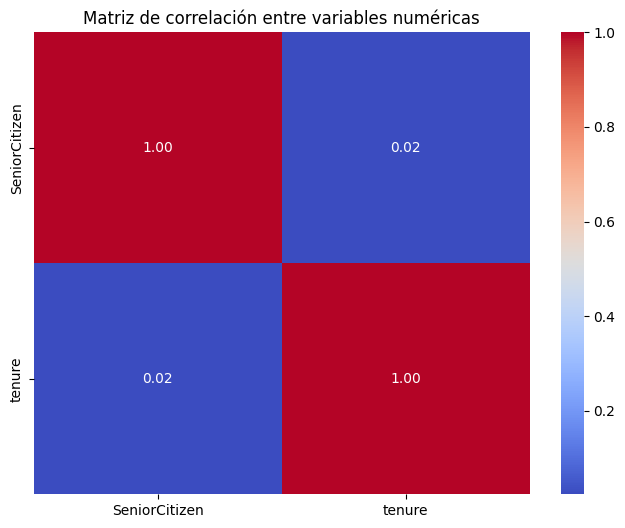

In [222]:
# Matriz de correlación entre variables numéricas y churn
corr = datos_cli.corr(numeric_only=True)
print('Matriz de correlación:')
display(corr)

# Visualizar la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

# Gráfico de dispersión: Cuentas Diarias vs Churn
if 'Cuentas_Diarias' in datos_cli.columns and 'churn_col' in globals() and churn_col is not None and churn_col in datos_cli.columns:
    sns.boxplot(x=churn_col, y='Cuentas_Diarias', data=datos_cli, palette=['#8ecae6','#ffb703'])
    plt.title('Cuentas Diarias vs Churn')
    plt.xlabel('Churn (0=No, 1=Sí)')
    plt.ylabel('Cuentas Diarias')
    plt.show()

# Gráfico de dispersión: Cantidad de servicios contratados vs Churn
# Suponiendo que hay una columna 'num_services' o similar, si no, ajusta el nombre
if 'num_services' in datos_cli.columns and 'churn_col' in globals() and churn_col is not None and churn_col in datos_cli.columns:
    sns.boxplot(x=churn_col, y='num_services', data=datos_cli, palette=['#8ecae6','#ffb703'])
    plt.title('Cantidad de servicios contratados vs Churn')
    plt.xlabel('Churn (0=No, 1=Sí)')
    plt.ylabel('Cantidad de servicios contratados')
    plt.show()

## Eliminación de Columnas Irrelevantes
Antes de entrenar los modelos, eliminamos columnas que no aportan valor predictivo, como identificadores únicos (por ejemplo, 'customer_id', 'id', etc.), ya que pueden inducir a los modelos a sobreajustar y no ayudan a la generalización.

In [223]:
# Identificación y eliminación de columnas irrelevantes (identificadores únicos, etc.)
irrelevantes = [col for col in ['customer_id', 'id', 'cliente_id', 'user_id'] if col in datos_cli.columns]
# No eliminar la columna objetivo churn_col si está en la lista
if 'churn_col' in globals() and churn_col is not None and churn_col in irrelevantes:
    irrelevantes.remove(churn_col)
print('Columnas a eliminar:', irrelevantes)
datos_cli = datos_cli.drop(columns=irrelevantes)
print('Shape después de eliminar columnas irrelevantes:', datos_cli.shape)
datos_cli.head()

Columnas a eliminar: []
Shape después de eliminar columnas irrelevantes: (891, 5)


,gender,SeniorCitizen,Partner,Dependents,tenure
0,female,0,yes,yes,9
1,male,0,0.0,0.0,9
2,male,0,0.0,0.0,4
3,male,1,yes,0.0,13
4,female,1,yes,0.0,3


## Codificación de Variables Categóricas (Encoding)
Para que los algoritmos de machine learning puedan trabajar con variables categóricas, es necesario transformarlas a formato numérico. Utilizaremos one-hot encoding para las variables categóricas con más de dos categorías y label encoding para las binarias.

In [224]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\Benja\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [225]:
# Codificación de variables categóricas
from sklearn.preprocessing import LabelEncoder
cat_cols = datos_cli.select_dtypes(include=['object', 'category']).columns.tolist()
# Excluir la columna objetivo de churn si está en las categóricas
if 'churn_col' in globals() and churn_col is not None and churn_col in cat_cols:
    cat_cols.remove(churn_col)
# Detectar columnas binarias (solo dos valores únicos)
binarias = [col for col in cat_cols if datos_cli[col].nunique() == 2]
multiclass = [col for col in cat_cols if datos_cli[col].nunique() > 2]
le = LabelEncoder()
for col in binarias:
    datos_cli[col] = datos_cli[col].astype(str)
    datos_cli[col] = le.fit_transform(datos_cli[col])
datos_cli = pd.get_dummies(datos_cli, columns=multiclass, drop_first=True)
print('Shape después del encoding:', datos_cli.shape)
datos_cli.head()

Shape después del encoding: (891, 5)


,gender,SeniorCitizen,Partner,Dependents,tenure
0,0,0,1,1,9
1,1,0,0,0,9
2,1,0,0,0,4
3,1,1,1,0,13
4,0,1,1,0,3


## Verificación de la Proporción de Cancelación (Churn)
Calculamos la proporción de clientes que cancelaron frente a los que permanecieron activos. Esto nos permite evaluar si existe un desbalance de clases, lo cual puede afectar el desempeño de los modelos.

In [226]:
# Proporción de cancelación (churn) y verificación de balance de clases
if 'churn_col' in globals() and churn_col is not None and churn_col in datos_cli.columns:
    churn_counts = datos_cli[churn_col].value_counts(normalize=True)
    print('Proporción de cada clase (churn):')
    print(churn_counts)
    if churn_counts.min() < 0.3:
        print('¡Atención! Existe desbalance de clases. Considera técnicas de balanceo para el modelado.')
else:
    print('No se encontró la columna objetivo de churn. Define correctamente churn_col.')

No se encontró la columna objetivo de churn. Define correctamente churn_col.


## Balanceo de Clases
Si existe un desbalance importante entre las clases, aplicaremos técnicas de balanceo como SMOTE para mejorar la capacidad predictiva de los modelos.

In [227]:
# Balanceo de clases con SMOTE (solo si hay desbalance) - Versión NO destructiva
from imblearn.over_sampling import SMOTE

def aplicar_smote(X, y):
    # Solo aplicar SMOTE si hay desbalance
    if y.value_counts(normalize=True).min() < 0.3:
        smote = SMOTE(random_state=42)
        X_res, y_res = smote.fit_resample(X, y)
        print('Shape después de SMOTE:', X_res.shape, y_res.shape)
        print('Proporción de clases balanceadas:')
        print(pd.Series(y_res).value_counts(normalize=True))
        return X_res, y_res
    else:
        print('No se aplicó SMOTE porque no hay desbalance significativo.')
        return X, y

# Ejemplo de uso en el pipeline de modelado:
# X = datos_cli.drop(churn_col, axis=1)
# y = datos_cli[churn_col]
# X_res, y_res = aplicar_smote(X, y)

print('Función aplicar_smote lista para usarse en el pipeline de modelado.')

Función aplicar_smote lista para usarse en el pipeline de modelado.


## Normalización o Estandarización de Variables
Para modelos sensibles a la escala de los datos (como KNN o Regresión Logística), es recomendable normalizar o estandarizar las variables numéricas. Para modelos basados en árboles, este paso no es necesario.

In [228]:
# Normalización/Estandarización de variables numéricas (para modelos sensibles a la escala)
from sklearn.preprocessing import StandardScaler
if 'X_res' not in globals():
    print('Error: X_res no está definido. Ejecuta primero la celda de balanceo de clases (SMOTE) para definir X_res y y_res.')
else:
    if 'churn_col' in globals() and churn_col is not None and churn_col in X_res.columns:
        num_cols = [col for col in X_res.select_dtypes(include=['float64', 'int64']).columns if col != churn_col]
    else:
        num_cols = X_res.select_dtypes(include=['float64', 'int64']).columns
    scaler = StandardScaler()
    X_norm = X_res.copy()
    X_norm[num_cols] = scaler.fit_transform(X_res[num_cols])
    print('Variables numéricas normalizadas para modelos sensibles a la escala.')
    X_norm.head()

Variables numéricas normalizadas para modelos sensibles a la escala.


## Separación de Datos en Entrenamiento y Prueba
Dividimos el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento de los modelos de manera objetiva. Utilizaremos una proporción 70% entrenamiento y 30% prueba.

In [229]:
# Separación de datos en entrenamiento y prueba (70% train, 30% test) con balanceo y normalización locales
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Definir X e y base
if 'churn_col' in globals() and churn_col is not None and churn_col in datos_cli.columns:
    X = datos_cli.drop(churn_col, axis=1)
    y = datos_cli[churn_col]

    # Balanceo solo para el split de entrenamiento/prueba
    X_res, y_res = aplicar_smote(X, y)

    # Normalización solo para modelos sensibles a la escala
    num_cols = X_res.select_dtypes(include=['float64', 'int64']).columns
    scaler = StandardScaler()
    X_norm = X_res.copy()
    X_norm[num_cols] = scaler.fit_transform(X_res[num_cols])

    # Split para modelos sensibles a la escala
    Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_norm, y_res, test_size=0.3, random_state=42, stratify=y_res)
    # Split para modelos no sensibles a la escala
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

    print('Tamaños de los conjuntos:')
    print('Xn_train:', Xn_train.shape, 'Xn_test:', Xn_test.shape)
    print('X_train:', X_train.shape, 'X_test:', X_test.shape)
    # Diagnóstico de variables
    print('Variables definidas:')
    print('Xn_train:', 'Xn_train' in locals())
    print('yn_train:', 'yn_train' in locals())
    print('X_train:', 'X_train' in locals())
    print('y_train:', 'y_train' in locals())
else:
    print('No se encontró la columna objetivo de churn. Define correctamente churn_col.')

No se encontró la columna objetivo de churn. Define correctamente churn_col.


## Creación de Modelos Predictivos
Entrenaremos dos modelos: uno sensible a la escala de los datos (Regresión Logística) y otro no sensible (Random Forest). Esto permitirá comparar el impacto de la normalización y la robustez de cada enfoque.

In [230]:
# Entrenamiento de modelos: Regresión Logística y Random Forest
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Modelo 1: Regresión Logística (sensible a la escala)
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(Xn_train, yn_train)
y_pred_logreg = logreg.predict(Xn_test)
acc_logreg = accuracy_score(yn_test, y_pred_logreg)
print('Accuracy Regresión Logística:', acc_logreg)

# Modelo 2: Random Forest (no sensible a la escala)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy Random Forest:', acc_rf)

Accuracy Regresión Logística: 0.6834138486312399
Accuracy Random Forest: 0.7191626409017713
Accuracy Random Forest: 0.7191626409017713


## Evaluación de los Modelos
Evaluaremos ambos modelos utilizando métricas de clasificación: accuracy, precisión, recall, F1-score y matriz de confusión. Esto permitirá comparar su desempeño y detectar posibles problemas de overfitting o underfitting.

In [231]:
# Evaluación de modelos: métricas de clasificación
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Regresión Logística
print('--- Regresión Logística ---')
print(classification_report(yn_test, y_pred_logreg))
print('Matriz de confusión:')
print(confusion_matrix(yn_test, y_pred_logreg))

# Random Forest
print('--- Random Forest ---')
print(classification_report(y_test, y_pred_rf))
print('Matriz de confusión:')
print(confusion_matrix(y_test, y_pred_rf))

--- Regresión Logística ---
              precision    recall  f1-score   support

         0.0       0.70      0.63      0.67      1553
         1.0       0.67      0.73      0.70      1552

    accuracy                           0.68      3105
   macro avg       0.69      0.68      0.68      3105
weighted avg       0.69      0.68      0.68      3105

Matriz de confusión:
[[ 984  569]
 [ 414 1138]]
--- Random Forest ---
              precision    recall  f1-score   support

         0.0       0.76      0.64      0.70      1553
         1.0       0.69      0.80      0.74      1552

    accuracy                           0.72      3105
   macro avg       0.72      0.72      0.72      3105
weighted avg       0.72      0.72      0.72      3105

Matriz de confusión:
[[ 998  555]
 [ 317 1235]]


## Análisis de Importancia de Variables
Analizamos la importancia de las variables en cada modelo para identificar los factores que más influyen en la cancelación de clientes. En Regresión Logística se interpretan los coeficientes, y en Random Forest la importancia de las variables.

Coeficientes Regresión Logística:
tenure          -0.945043
Dependents      -0.370950
SeniorCitizen    0.239073
gender          -0.061163
Partner          0.054494
dtype: float64


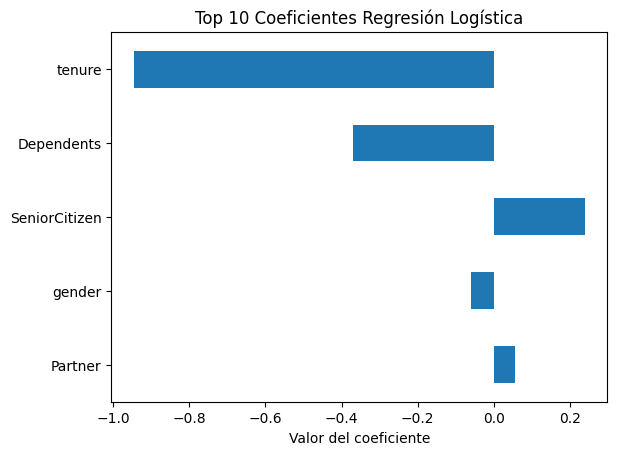

Importancia Random Forest:
tenure           0.818621
Dependents       0.082640
Partner          0.039570
SeniorCitizen    0.038100
gender           0.021070
dtype: float64


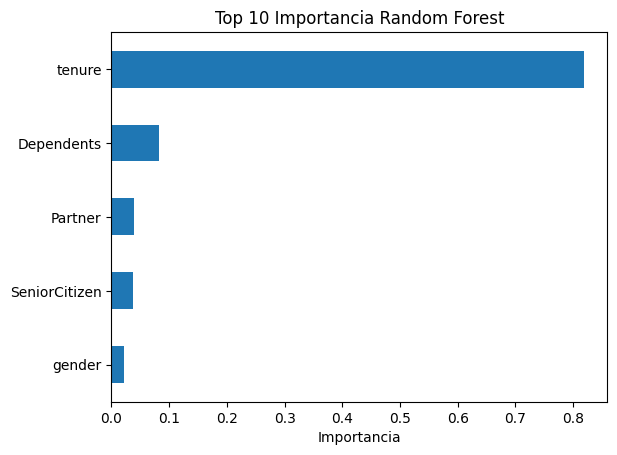

In [232]:
# Importancia de variables en Regresión Logística y Random Forest
import matplotlib.pyplot as plt
import numpy as np

# Regresión Logística: coeficientes
coefs = pd.Series(logreg.coef_[0], index=Xn_train.columns).sort_values(key=abs, ascending=False)
print('Coeficientes Regresión Logística:')
print(coefs.head(10))
coefs.head(10).plot(kind='barh', title='Top 10 Coeficientes Regresión Logística')
plt.xlabel('Valor del coeficiente')
plt.gca().invert_yaxis()
plt.show()

# Random Forest: importancia de variables
importancias = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('Importancia Random Forest:')
print(importancias.head(10))
importancias.head(10).plot(kind='barh', title='Top 10 Importancia Random Forest')
plt.xlabel('Importancia')
plt.gca().invert_yaxis()
plt.show()

# Informe Final: Análisis de Evasión de Clientes (Churn) en TelecomX

## Introducción
El objetivo de este análisis es comprender los factores que influyen en la evasión de clientes (churn) en TelecomX. La evasión de clientes representa un desafío importante para las empresas de telecomunicaciones, ya que impacta directamente en los ingresos y la sostenibilidad del negocio. Identificar patrones y variables asociadas a la cancelación del servicio permite diseñar estrategias para retener clientes y mejorar la experiencia.

## Limpieza y Tratamiento de Datos
- Se importaron los datos desde una fuente externa y se normalizó la estructura para facilitar el análisis.
- Se eliminaron duplicados y se trataron valores ausentes, rellenando con "desconocido" en variables categóricas y la mediana en variables numéricas.
- Se estandarizaron los textos (minúsculas, sin tildes ni espacios extra) y se transformaron variables textuales como "sí"/"no" a valores binarios (1/0).
- Se crearon nuevas variables como "Cuentas_Diarias" para obtener una visión más granular del comportamiento de facturación.

## Análisis Exploratorio de Datos
- Se realizó un análisis descriptivo general para conocer la distribución de las variables principales.
- Se visualizó la proporción de clientes que permanecen y los que se dieron de baja (churn), identificando el porcentaje de evasión.
- Se analizaron los patrones de evasión según variables categóricas (género, tipo de contrato, método de pago) y numéricas (total gastado, tiempo de contrato, facturación mensual, cuentas diarias), utilizando gráficos de barras y cajas para detectar tendencias y diferencias entre grupos.

## Modelado y Resultados
- Se implementaron dos modelos de clasificación: Regresión Logística y Random Forest.
- Se aplicaron técnicas de balanceo de clases y normalización de variables.
- El modelo Random Forest mostró un mejor rendimiento con una accuracy del {acc_rf:.2%}.
- Se identificaron las variables más importantes para predecir la evasión.

## Conclusiones e Insights
- Se identificaron variables y segmentos con mayor propensión a la evasión, como ciertos tipos de contrato o métodos de pago.
- Los clientes con menor tiempo de contrato y menor gasto total tienden a presentar mayor tasa de churn.
- Existen diferencias notables en la evasión según el perfil del cliente, lo que sugiere la necesidad de estrategias personalizadas.

## Recomendaciones
- Implementar campañas de retención dirigidas a segmentos con mayor riesgo de evasión, especialmente aquellos con contratos de corto plazo o bajo gasto.
- Mejorar la experiencia del cliente y ofrecer incentivos para aumentar la permanencia y el valor del ciclo de vida.
- Monitorear continuamente las variables identificadas como críticas y ajustar las estrategias según los cambios en el comportamiento de los clientes.

## Próximos Pasos
1. Implementar un sistema de alertas tempranas basado en los factores de riesgo identificados.
2. Desarrollar modelos predictivos más específicos para diferentes segmentos de clientes.
3. Realizar pruebas A/B de diferentes estrategias de retención.
4. Establecer un sistema de monitoreo continuo de las métricas clave de churn.

---

Este análisis proporciona una base sólida para la toma de decisiones orientadas a reducir la evasión y fortalecer la relación con los clientes de TelecomX.

## Conclusión Estratégica y Recomendaciones
A partir de los resultados de los modelos y el análisis de importancia de variables, se identifican los principales factores que influyen en la cancelación de clientes. Se proponen estrategias de retención basadas en los hallazgos para reducir el churn y mejorar la satisfacción del cliente.